# Retificador de onda completa (Carga R/C)

<center>
<img width="350" height="500" src="Figuras/10_onda_completa_rc.png">
</center>

$$
\begin{equation}
v_{o}(\omega t) = 
\begin{cases} \label{m2}
\mid V_{m}\sin(\omega t) \mid & \textrm{one diode pair on}\\
(V_{m}\sin(\theta))e^{\frac{-(\omega t -\theta)}{\omega RC}} & \textrm{diodes off}
\end{cases} \tag{4-8}
\end{equation}
$$

$$
\begin{equation}
\theta = \pi - \tan^{-1}(\omega RC) \tag{4-9}
\end{equation}
$$

$$
\begin{equation}
\sin(\theta)e^{\frac{-(\pi + \alpha -\theta)}{\omega RC}} - \sin(\alpha)= 0 \tag{4-10}
\end{equation}
$$

In [2]:
from funcoes import *
%run funcoes.py
%matplotlib inline

In [3]:
################# Definições 1 ##################
V_pk = 120*sqrt(2)
Freq = 60
R = 500
C = 100e-6

In [29]:
################# Definições 2 ##################
V_pk = 220*sqrt(2)
P = 200
Freq = 60

Vc1_max = V_pk
Vc1_min = Vc1_max*0.96

V_med = (Vc1_max + Vc1_min)/2

R = V_med**2/P

##OU##

#Define Valor Vc1_min
#Vc1_min = 210
#V_med = (Vc1_max + Vc1_min)/2


C = (P/(Freq*(Vc1_max**2 - Vc1_min**2)))

print(C, "F", R, "ohm")

0.000439225276887614 F 464.8336 ohm


1.2996860978695337


/home/diesson/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


# - Tensão na carga - # 
Vpk:	 311.1269837220809 
Vm: 	 305.58716115723905 
Vrms: 	 305.6054161102821
# - Corrente na fase - # 
Ipk: 	 13.954255635766742 
Im: 	 -1.0307646768702129e-15 
Irms: 	 2.5209978687438794
# - Corrente no resistor - # 
Ipk: 	 0.6693264906266588 
Im: 	 0.6574119451718614 
Irms: 	 0.6574512171888651
# - Corrente no capacitor - # 
Ipk: 	 13.620712028501355 
Im: 	 0.023908860243374026 
Irms: 	 2.427384681992226
# - Corrente de saída - # 
Ipk: 	 14.266224451098234 
Im: 	 0.6574206344462975 
Irms: 	 2.5209978687438794
# - Potências de uma fase - # 
Ppk:	 4280.664292855933 
P: 	 200.92325710977678 
S: 	 554.6195311236535
# - Fatores - # 
FP:	 0.3622722349909105 
THD V:	 0.0018850159739448897 
THD I:	 2.531727999673582


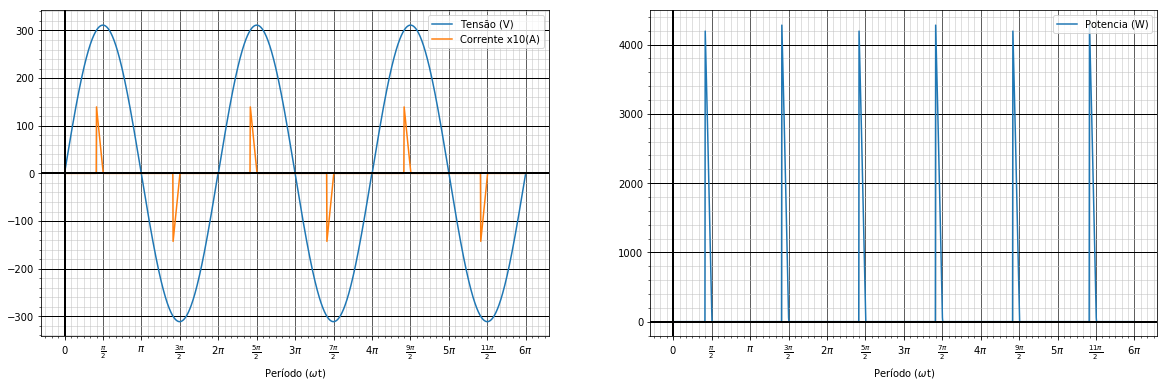

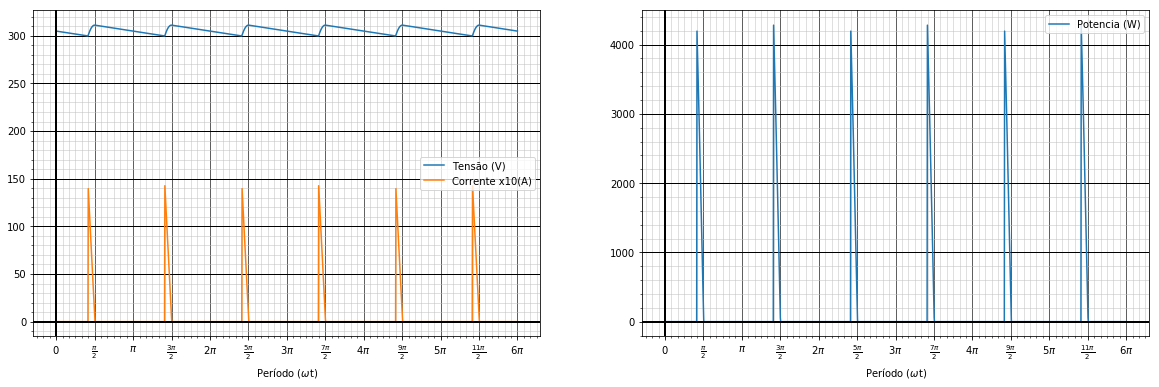

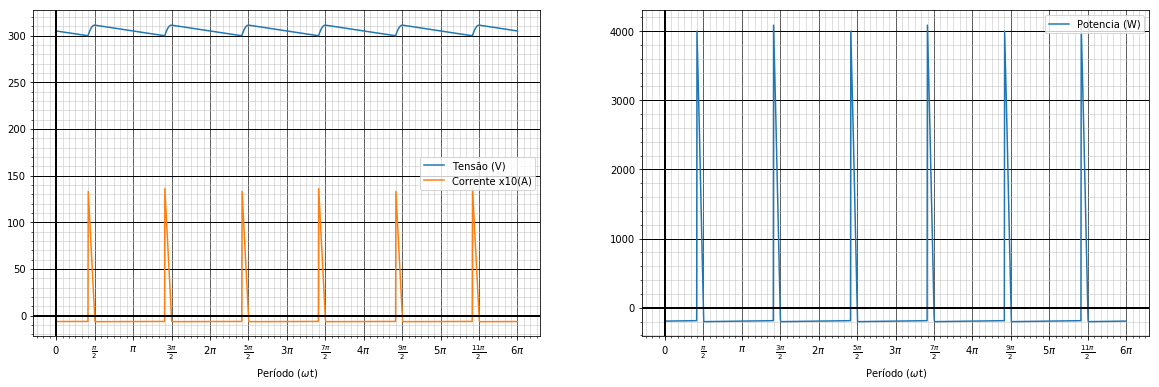

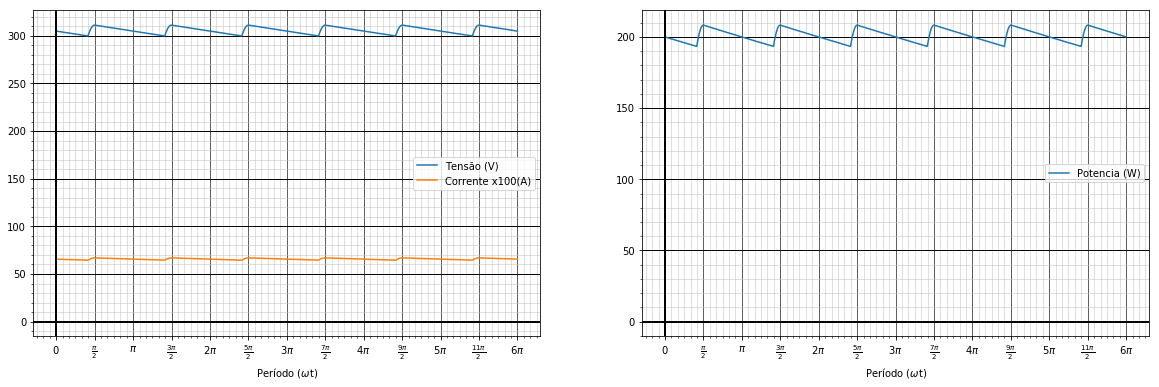

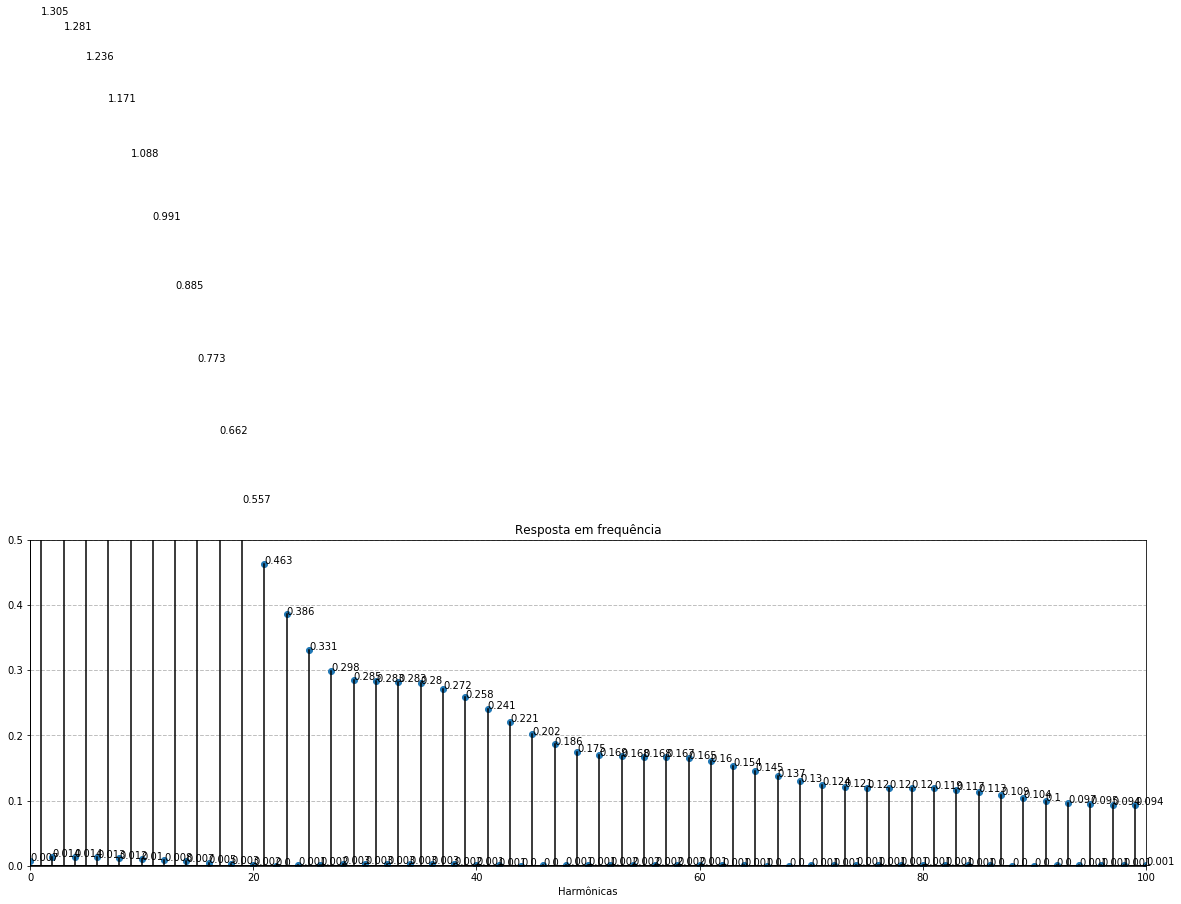

In [27]:
########## RETIFICADOR ONDA COMPLETA ############
################### CARGA RC ####################

w = 2*pi*Freq

XC = 1 / (w * C)
XRC = complex(R,-XC)

Z = abs(XRC)

teta = pi - atan(w*R*C) #(r, phi) = polar(z)
tal = 1 / (R * C)

T = 2*pi

ab = calculo_ab(f'sin({teta})*exp(-({pi}+x-{teta})/{w*R*C}) - sin(x)', 0, 'numpy')
a = ab[0]
print(a)


# Tensão de saída do retificador
func_vout = f'({rampa_RC(V_pk, teta, w*R*C, pi)} *({degrau(0, a)}))'
# Parcela
func_vout = f'{func_vout} + ({V_pk}*sin(x)*{degrau(a,teta)})'
func_vout = f'{func_vout} + ({rampa_RC(V_pk, teta, w*R*C)} *({degrau(teta, pi+a)}))'
func_vout = f'{func_vout} + ({V_pk}*sin(x+{pi})*{degrau(pi+a,pi+teta)})'
func_vout = f'{func_vout} + ({rampa_RC(V_pk, teta, w*R*C, -pi)} *({degrau(pi+teta, 2*pi)}))'
Vout_media = calculo_medio(func_vout)
Vout_rms = calculo_rms(func_vout)

# Corrente no resistor do retificador trifásico com ponto médio
func_ir = f'(({func_vout})/{R})'
Ir_media = calculo_medio(func_ir)
Ir_rms = calculo_rms(func_ir)
Ir_pk = calculo_pk(func_ir)

# Corrente no capacitor do retificador
func_ic = f'({rampa_RC(-V_pk/R, teta, w*R*C,2*pi)}*{degrau(0,a)})'
func_ic = f'{func_ic} + ({w*C*V_pk}*cos(x)*{degrau(a,teta)})'
func_ic = f'{func_ic} + ({rampa_RC(-V_pk/R, teta, w*R*C, pi)}*{degrau(teta,pi+a)})'
func_ic = f'{func_ic} + ({w*C*V_pk}*cos(x+{pi})*{degrau(pi+a,pi+teta)})'
func_ic = f'{func_ic} + ({rampa_RC(-V_pk/R, teta, w*R*C)}*{degrau(pi+teta,2*pi)})'

Ic_media = calculo_medio(func_ic)
Ic_rms = calculo_rms(func_ic)
Ic_pk = calculo_pk(func_ic)

# Corrente de saída do retificador
func_iout = f'({func_ic} + {func_ir}) * ({degrau(a,teta)} + {degrau(pi+a,pi+teta)} )'
# Calculos com base na forma de onda
Iout_media = calculo_medio(func_iout)
Iout_rms = calculo_rms(func_iout)
Iout_pk = calculo_pk(func_iout)

# Tensão de entrada
func_vin = f'{V_pk}*sin(x)'
Vin_media = calculo_medio(func_vin)
Vin_rms = calculo_rms(func_vin)

# Corrente de entrada de uma fase do retificador trifásico com ponto médio
func_iin = f'({func_iout})*{degrau(0,pi,1,-2)}'
Iin_media = calculo_medio(func_iin)
Iin_rms = calculo_rms(func_iin)
Iin_pk = calculo_pk(func_iin)

# Potencia ativa e aparente da entrada do retificador
func_p = f'({func_vin}) * ({func_iin})'
P = calculo_medio(func_p)
S = Iin_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_vin, T)
thdI = calculo_thd(func_iin, T)

print("# - Tensão na carga - #"       , "\nVpk:\t" , V_pk   , "\nVm: \t"  , Vout_media, "\nVrms: \t", Vout_rms)
print("# - Corrente na fase - #"      , "\nIpk: \t", Iin_pk , "\nIm: \t"  , Iin_media , "\nIrms: \t", Iin_rms)
print("# - Corrente no resistor - #"  , "\nIpk: \t", Ir_pk  , "\nIm: \t"  , Ir_media  , "\nIrms: \t", Ir_rms)
print("# - Corrente no capacitor - #" , "\nIpk: \t", Ic_pk  , "\nIm: \t"  , Ic_media  , "\nIrms: \t", Ic_rms)
print("# - Corrente de saída - #"     , "\nIpk: \t", Iout_pk, "\nIm: \t"  , Iout_media, "\nIrms: \t", Iout_rms)
print("# - Potências de uma fase - #" , "\nPpk:\t" , P_pk   , "\nP: \t"   , P         , "\nS: \t"   , S)
print("# - Fatores - #"               , "\nFP:\t"  , FP     , "\nTHD V:\t", thdV      , "\nTHD I:\t", thdI)

plot_info(func_vin, func_iin, xlim=(0, T))
plot_info(func_vout, func_iout, xlim=(0, T))
plot_info(func_vout, func_ic, xlim=(0, T))
plot_info(func_vout, func_ir, xlim=(0, T))

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_iin, ax2, T=2*np.pi, n_harmonicas = 100)